# DEBUG: MSLP daily anomaly weird values
### 2023/08/17 
MSLP daily anomaly is always around +50, in all the cases. Why is this?
## FOUND: 
### 2023/08/18
MSLP climatology has tmax as a variable, why? mistake in the creation of 1981 to 1983 files.
Re-retrieved, calculated daily aggregation, climatology and anomaly
## SOLVED
### 2023/08/18

In [84]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy
import sys
import importlib

import CLINT001_functions as clint

In [85]:
## DIRECTORIES
machine = 'laptop'

if machine == 'laptop':
    modeldir = '~/Documents/CMCC-GoogleDrive/ERA5/'
    
if machine == 'workstation':
    modeldir = '~/Documents/CLINT-GoogleDrive/ERA5/'

In [86]:
### Read series of tmax and HWMI related to Lake Como
lchw = pd.read_csv('LakeComo_tmax_HW.csv',index_col='date')

In [87]:
### Identify 2019 heat wave

row_maxHWMI = lchw.loc[lchw['Valle_HWintensity'].idxmax()]
date2019_dt = dt.strptime(row_maxHWMI.name,"%Y-%m-%d")
date2019_ts = pd.to_datetime(date2019_dt)

In [88]:
drivers = pd.read_csv('./metadata/drivers.csv')

In [89]:
drivers

,var,nc_var,cluster,cluster_info,minlag,maxlag,cluster_centre_lon,cluster_centre_lat,cl_ortho_lon,cl_ortho_lat,cl_ext_W,cl_ext_E,cl_ext_S,cl_ext_N,vmin,vmax,empty,meanlag
0,tmax,mx2t,EU1t,Central Europe,0,16,14.0,54.0,14.0,50.0,-2.0,30.0,40.0,60.0,-10.0,10.0,NaN,8
1,tmax,mx2t,EU2t,North Atlantic,30,41,-6.0,42.0,0.0,50.0,-16.0,16.0,30.0,70.0,-10.0,10.0,NaN,35
2,mslp,msl,EU1p,Mediterranean,0,8,4.0,36.0,14.0,40.0,-16.0,44.0,25.0,50.0,-200.0,200.0,NaN,4
3,mslp,msl,EU2p,Eastern Europe,70,86,32.0,54.0,27.0,53.0,10.0,44.0,46.0,65.0,-200.0,200.0,NaN,78
4,mslp,msl,WO2p,Greenland,40,61,-78.0,80.0,-45.0,70.0,-130.0,40.0,5.0,90.0,-200.0,200.0,NaN,50
5,sm,sm,EU1sm,Eastern Europe,0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
6,sic,sic,AC1sic,North Atlantic and North Pacific,30,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40


In [90]:
### Set parameters

var='mslp'
drivers_sub = drivers.loc[drivers['var'] == var]
y = 2019

In [91]:
## DIRECTORIES
machine = 'laptop'

if machine == 'laptop':
    modeldir = '~/Documents/CMCC-GoogleDrive/ERA5/'
    
if machine == 'workstation':
    modeldir = '~/Documents/CLINT-GoogleDrive/ERA5/'

## Example: 2019, mslp. Mediterranean 

In [92]:
### Mediterranean 0 to 8 days before

drivers_row = drivers_sub.copy().iloc[0]

In [93]:
drivers_row.loc['maxlag']=0

In [94]:
#drivers_row

In [95]:
#importlib.reload(clint)

### Anomaly around 50: starting point

In [96]:
### ERA5 Pressure anomaly 2019

mslpa2019 = xr.open_dataset(f'{modeldir}/era5_{var}_dailyanom_{y}_cropped.nc')
mslpa2019['msl'] = mslpa2019.msl/100

#### Maps

In [97]:
drivers_row

var                            mslp
nc_var                          msl
cluster                        EU1p
cluster_info          Mediterranean
minlag                            0
maxlag                            0
cluster_centre_lon              4.0
cluster_centre_lat             36.0
cl_ortho_lon                   14.0
cl_ortho_lat                   40.0
cl_ext_W                      -16.0
cl_ext_E                       44.0
cl_ext_S                       25.0
cl_ext_N                       50.0
vmin                         -200.0
vmax                          200.0
empty                           NaN
meanlag                           4
Name: 2, dtype: object

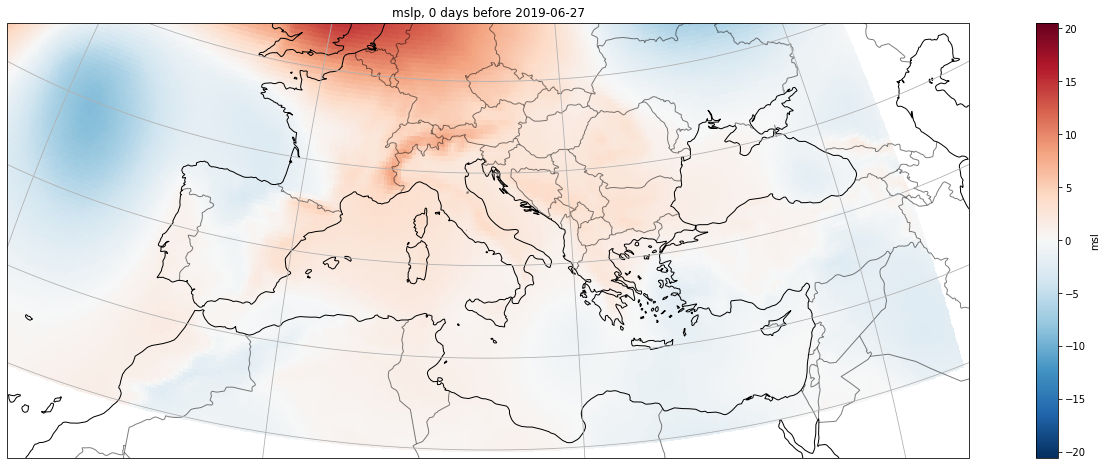

In [100]:
importlib.reload(clint)
clint.set_maps_lag (xrdf = mslpa2019, targetdate_ts = date2019_ts, drivers_row = drivers_row, 
              fig_width = 24, fig_height = 8, vmin = None, vmax = None,
              proj = 'Orthographic')

### What are the absolute values?

In [101]:
### ERA5 Pressure 2019

mslpd2019 = xr.open_dataset(f'{modeldir}/era5_{var}_daily_{y}_cropped.nc')
mslpd2019['msl'] = mslpd2019.msl/100

#### Maps

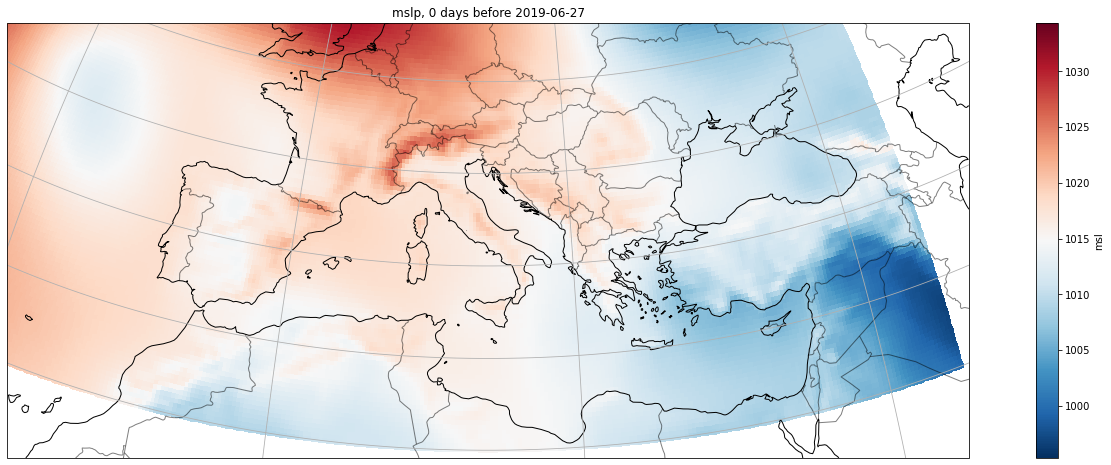

In [102]:
importlib.reload(clint)
clint.set_maps_lag (xrdf = mslpd2019, targetdate_ts = date2019_ts, drivers_row = drivers_row, 
              fig_width = 24, fig_height = 8, vmin=None, vmax=None,
              proj = 'Orthographic')

### What are the climatological values?

In [114]:
### ERA5 Pressure 2019

mslpc2019 = xr.open_dataset(f'{modeldir}/era5_{var}_ydailyclim_8110_cropped.nc')
mslpc2019['msl'] = mslpc2019.msl/100

In [115]:
date2019_ts

Timestamp('2019-06-27 00:00:00')

In [116]:
dateclim_ts = pd.to_datetime('2022-06-27')

#### Maps

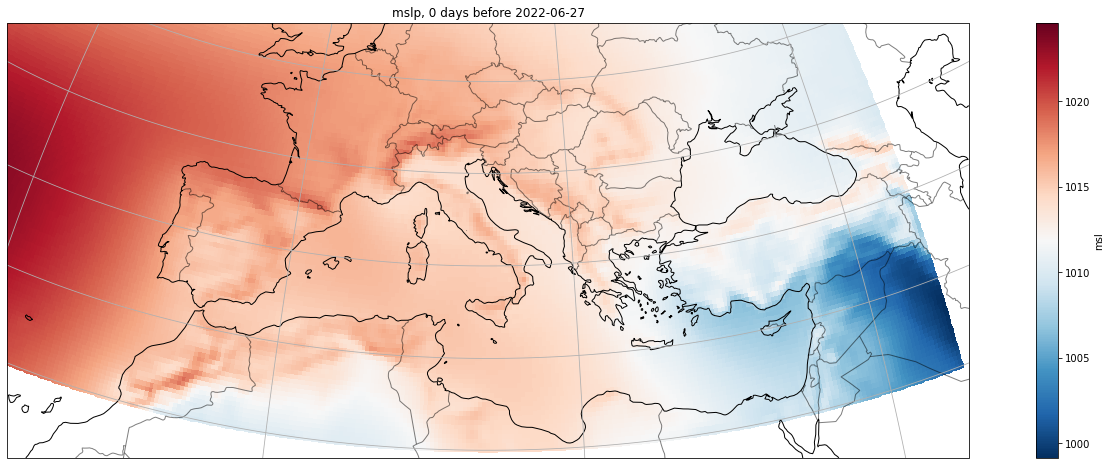

In [117]:
importlib.reload(clint)
clint.set_maps_lag (xrdf = mslpc2019, targetdate_ts = dateclim_ts, drivers_row = drivers_row, 
              fig_width = 24, fig_height = 8, vmin=None, vmax=None,
              proj = 'Orthographic')